# By MrJGan

# Last update : 11/10/2020

# Practice notebook for univariate analysis using NHANES data

Only codes for graphs and tables are provided.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv(r'C:\Users\J\nhanes_2015_2016.csv.txt')
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

# Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.317497,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.298392
BPXDI1,0.317497,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.298392,0.884722,1.000000


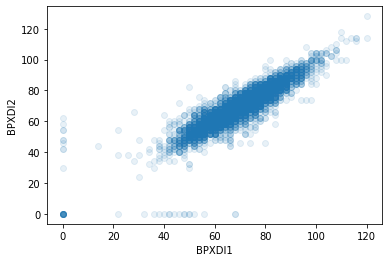

In [2]:
sns.regplot(da.BPXDI1, da.BPXDI2, fit_reg = False, scatter_kws = {'alpha': 0.1})

da.loc[:,['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']].dropna().corr()

# Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

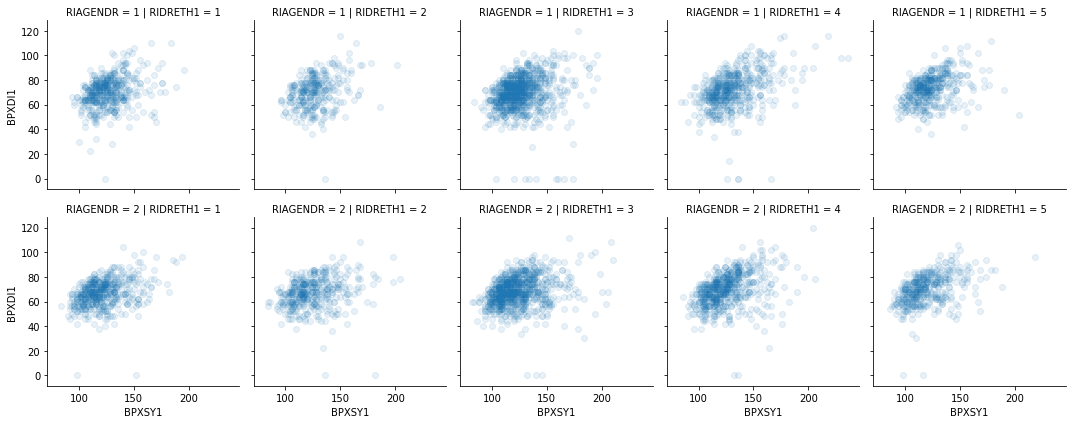

In [3]:
sns.FacetGrid(da, col = 'RIDRETH1', row = 'RIAGENDR').map(plt.scatter, 'BPXSY1', 'BPXDI1', alpha = 0.1)

# Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

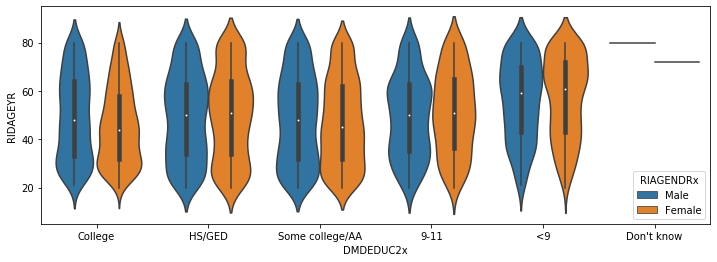

In [4]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: '<9', 2: '9-11', 3: 'HS/GED', 4: 'Some college/AA', 5: 'College', 
                                       7: 'Refused', 9: 'Don\'t know'})
da['RIAGENDRx'] = da.RIAGENDR.replace({1: 'Male', 2: 'Female'})

plt.figure(figsize = (12,4))
sns.violinplot(data = da, hue = 'RIAGENDRx', x = 'DMDEDUC2x', y = 'RIDAGEYR')

# Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

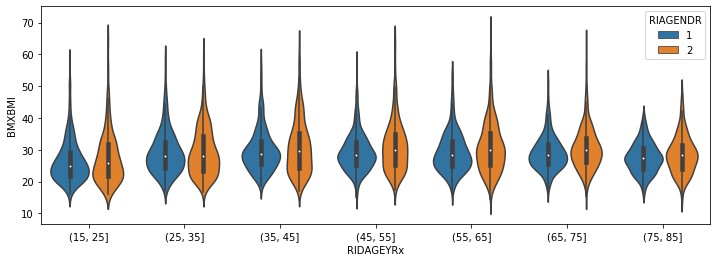

In [5]:
da['RIDAGEYRx'] = pd.cut(da.RIDAGEYR, [15, 25, 35, 45, 55, 65, 75, 85])
plt.figure(figsize = (12,4))
sns.violinplot(data = da, hue = 'RIAGENDR', x = 'RIDAGEYRx', y = 'BMXBMI')

# Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [6]:
da['RIDRETH1x'] = da.RIDRETH1.replace({1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', 4: 'Non-Hispanic Black', 5: 'Other Race'})
da['HIQ'] = da.HIQ210.replace({1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don\'t know'})
da.groupby(['RIDRETH1x','HIQ']).size().unstack().fillna(0).apply(lambda z: z/z.sum(), axis = 1)

HIQ,Don't know,No,Yes
RIDRETH1x,,,
Mexican American,0.004451,0.857567,0.137982
Non-Hispanic Black,0.000962,0.890385,0.108654
Non-Hispanic White,0.001214,0.931432,0.067354
Other Hispanic,0.000000,0.871304,0.128696
Other Race,0.002516,0.915723,0.081761
